In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

> **Veri Kaynağı:** https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset/data

In [90]:
df = pd.read_csv("../data/HepatitisCdata.csv")

In [91]:
df.sample(4)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
467,468,0=Blood Donor,52,f,41.7,58.3,22.9,26.7,11.4,9.17,4.33,75.0,14.5,77.1
402,403,0=Blood Donor,45,f,46.4,49.1,14.9,25.5,11.0,8.77,2.86,94.0,12.0,77.1
156,157,0=Blood Donor,46,m,45.9,80.1,67.5,36.7,2.9,8.73,4.68,113.0,50.1,68.8
261,262,0=Blood Donor,57,m,43.3,86.8,21.2,22.2,6.8,7.87,4.91,65.0,19.2,71.3


In [92]:
df.Category.value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,615.0,308.000000,177.679487,1.00,154.500,308.00,461.500,615.00
Age,615.0,47.408130,10.055105,19.00,39.000,47.00,54.000,77.00
ALB,614.0,41.620195,5.780629,14.90,38.800,41.95,45.200,82.20
ALP,597.0,68.283920,26.028315,11.30,52.500,66.20,80.100,416.60
ALT,614.0,28.450814,25.469689,0.90,16.400,23.00,33.075,325.30
AST,615.0,34.786341,33.090690,10.60,21.600,25.90,32.900,324.00
BIL,615.0,11.396748,19.673150,0.80,5.300,7.30,11.200,254.00
CHE,615.0,8.196634,2.205657,1.42,6.935,8.26,9.590,16.41
CHOL,605.0,5.368099,1.132728,1.43,4.610,5.30,6.060,9.67
CREA,615.0,81.287805,49.756166,8.00,67.000,77.00,88.000,1079.10


In [95]:
df.drop("Unnamed: 0", axis=1, inplace=True)
# le: Category, Sex
le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])
df["Sex"] = le.fit_transform(df["Sex"])

In [96]:
df.fillna(df.median(), inplace=True)

In [97]:
df.quantile([0.05, 0.1, 0.2, 0.6, 0.8, 0.9, 0.95, 0.99, 1]).T

,0.05,0.10,0.20,0.60,0.80,0.90,0.95,0.99,1.00
Category,0.000,0.000,0.000,0.000,0.00,2.00,3.000,4.0000,4.00
Age,33.000,34.000,37.000,50.000,56.00,61.00,64.300,71.0000,77.00
Sex,0.000,0.000,0.000,1.000,1.00,1.00,1.000,1.0000,1.00
ALB,32.280,35.640,38.000,43.100,46.00,47.40,48.930,53.2580,82.20
ALP,37.070,42.740,50.780,70.940,83.52,92.20,103.510,137.1580,416.60
ALT,8.510,11.900,15.200,25.940,36.12,46.70,62.030,118.0860,325.30
AST,16.670,18.180,20.580,28.140,35.62,52.48,91.840,187.3220,324.00
BIL,3.000,3.700,4.700,8.600,12.84,18.00,24.030,87.6400,254.00
CHE,4.541,5.614,6.608,8.748,9.94,10.67,11.362,13.8516,16.41
CHOL,3.627,4.038,4.450,5.560,6.26,6.79,7.290,8.5804,9.67


In [98]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,4,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,4,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,4,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,4,46,0,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [111]:
y = df[["Category"]]
X = df.drop("Category", axis=1)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2, stratify=y, shuffle=True)

Train Accuracy without scaler: 0.9308943089430894
Test accuracy without scaler: 0.9105691056910569

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         5
           3       0.50      0.50      0.50         4
           4       0.75      0.50      0.60         6

    accuracy                           0.91       123
   macro avg       0.44      0.40      0.41       123
weighted avg       0.88      0.91      0.89       123



<Axes: >

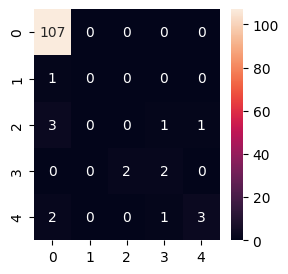

In [113]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Train Accuracy without scaler:", accuracy_score(y_train, knn.predict(X_train)))
print("Test accuracy without scaler:", accuracy_score(y_test, y_pred)) 

print("\n", classification_report(y_test, y_pred))

plt.figure(figsize=(3, 3))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [114]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,4,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,4,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,4,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,4,46,0,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [116]:
# Scaler: 
sc = StandardScaler()
cols = ["Age", "Sex", "ALB", "ALP", "ALT",	"AST", "BIL", "CHE", "CHOL", "CREA", "GGT",	"PROT"]

for col in cols:
    X_train[col] = sc.fit_transform(X_train[[col]])
    X_test[col] = sc.transform(X_test[[col]])

Train Accuracy without scaler: 0.9146341463414634
Test accuracy without scaler: 0.9105691056910569

               precision    recall  f1-score   support

           0       0.92      1.00      0.96       107
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         5
           3       1.00      0.50      0.67         4
           4       0.75      0.50      0.60         6

    accuracy                           0.91       123
   macro avg       0.53      0.40      0.45       123
weighted avg       0.87      0.91      0.89       123



<Axes: >

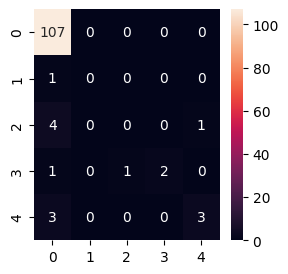

In [117]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Train Accuracy without scaler:", accuracy_score(y_train, knn.predict(X_train)))
print("Test accuracy without scaler:", accuracy_score(y_test, y_pred)) 

print("\n", classification_report(y_test, y_pred))

plt.figure(figsize=(3, 3))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d")